## Kalvium SWE  Task 

## SANJAY.M

In [ ]:
pip install streamlit pymupdf pillow


In [ ]:
pip install streamlit


In [ ]:
pip install pymupdf




**Use Case: Enhanced Remote Learning and Student Engagement Monitoring**

In traditional offline classrooms, teachers can naturally observe students’ engagement and attentiveness. However, in online learning environments, student monitoring becomes more challenging. This platform addresses these gaps by allowing a teacher (or presenter) to actively monitor students' engagement during virtual sessions. 

The platform lets the teacher set up a session with several viewers (students). Based on the teacher’s preference, they can present a PDF file (where students follow along without interactive control) or share a URL (where students can scroll the page but stay on the designated resource). The teacher has a view of each student’s screen in real time, helping maintain attentiveness and ensuring students remain engaged with the learning material.


### **Use Case 1: Admin Initiates and Controls the Presentation**

**Scenario:** A teacher initiates an online class by setting a limit on the number of students (viewers) who can join the session. This limit is adjustable based on the specific class or topic requirements.

**Functionality:**
- The teacher (admin) uploads a PDF or inputs a URL to begin presenting.
- Students view the content exactly as presented, which helps them follow along with the teacher’s instructions.
- If the teacher shares a URL, students can explore the page but remain within the bounds of the lesson’s resource.

**Benefit:** Teachers maintain control over the number of students and have clear insight into each student’s actions within the session, ensuring an organized and focused learning environment.



In [18]:
streamlit_code = """
import streamlit as st
import fitz  # PyMuPDF for PDF handling
import io
from PIL import Image

# App title
st.title("Real-Time PDF Co-Viewer & URL Viewer")

# Initialize session state for current page
if "current_page" not in st.session_state:
    st.session_state.current_page = 1

# Role selection (Admin or Viewer)
role = st.radio("Choose your role:", ("Viewer", "Admin"))

# Only Admin has the option to upload PDF or enter URL
if role == "Admin":
    # Option for PDF or URL
    content_type = st.selectbox("Select content type:", ("PDF", "URL"))

    if content_type == "PDF":
        # Upload PDF
        pdf_file = st.file_uploader("Upload a PDF", type=["pdf"])
        
        if pdf_file:
            # Open the PDF with PyMuPDF
            pdf = fitz.open(stream=pdf_file.read(), filetype="pdf")
            total_pages = pdf.page_count

            # Admin controls page with a slider
            st.session_state.current_page = st.slider("Navigate through pages", 1, total_pages, st.session_state.current_page)
            
            # Display the current page for the admin
            page = pdf.load_page(st.session_state.current_page - 1)  # zero-indexed
            pix = page.get_pixmap()
            img = Image.open(io.BytesIO(pix.tobytes("png")))
            st.image(img, caption=f"Admin - Page {st.session_state.current_page}/{total_pages}", use_column_width=True)

            # Close the PDF when done
            pdf.close()
    
    elif content_type == "URL":
        # URL input field
        url = st.text_input("Enter the URL to share:")
        
        if url:
            st.write("You are presenting the URL. Viewers will follow along.")
            # Admin can display the content in the iframe (if it's a webpage)
            st.markdown(f'<iframe src="{url}" width="800" height="600"></iframe>', unsafe_allow_html=True)

elif role == "Viewer":
    # Viewers just see the content being presented by the admin
    st.write("Following the admin's lead...")
    
    # If the admin is presenting a PDF or URL, viewers will see it.
    # For PDF, just show the current page (as per the admin's navigation).
    # For URL, show the content in an iframe (same as admin's display).

    # Placeholder for the viewer (they only see what the admin shares)
    st.write("You are viewing the content shared by the admin.")
"""

# Save the code as a .py file
with open("pdf_and_url_co_viewer_admin_only.py", "w") as file:
    file.write(streamlit_code)


In [ ]:
streamlit run "C:\Users\mural\anaconda3\python\job\pdf_and_url_co_viewer_admin_only.py"

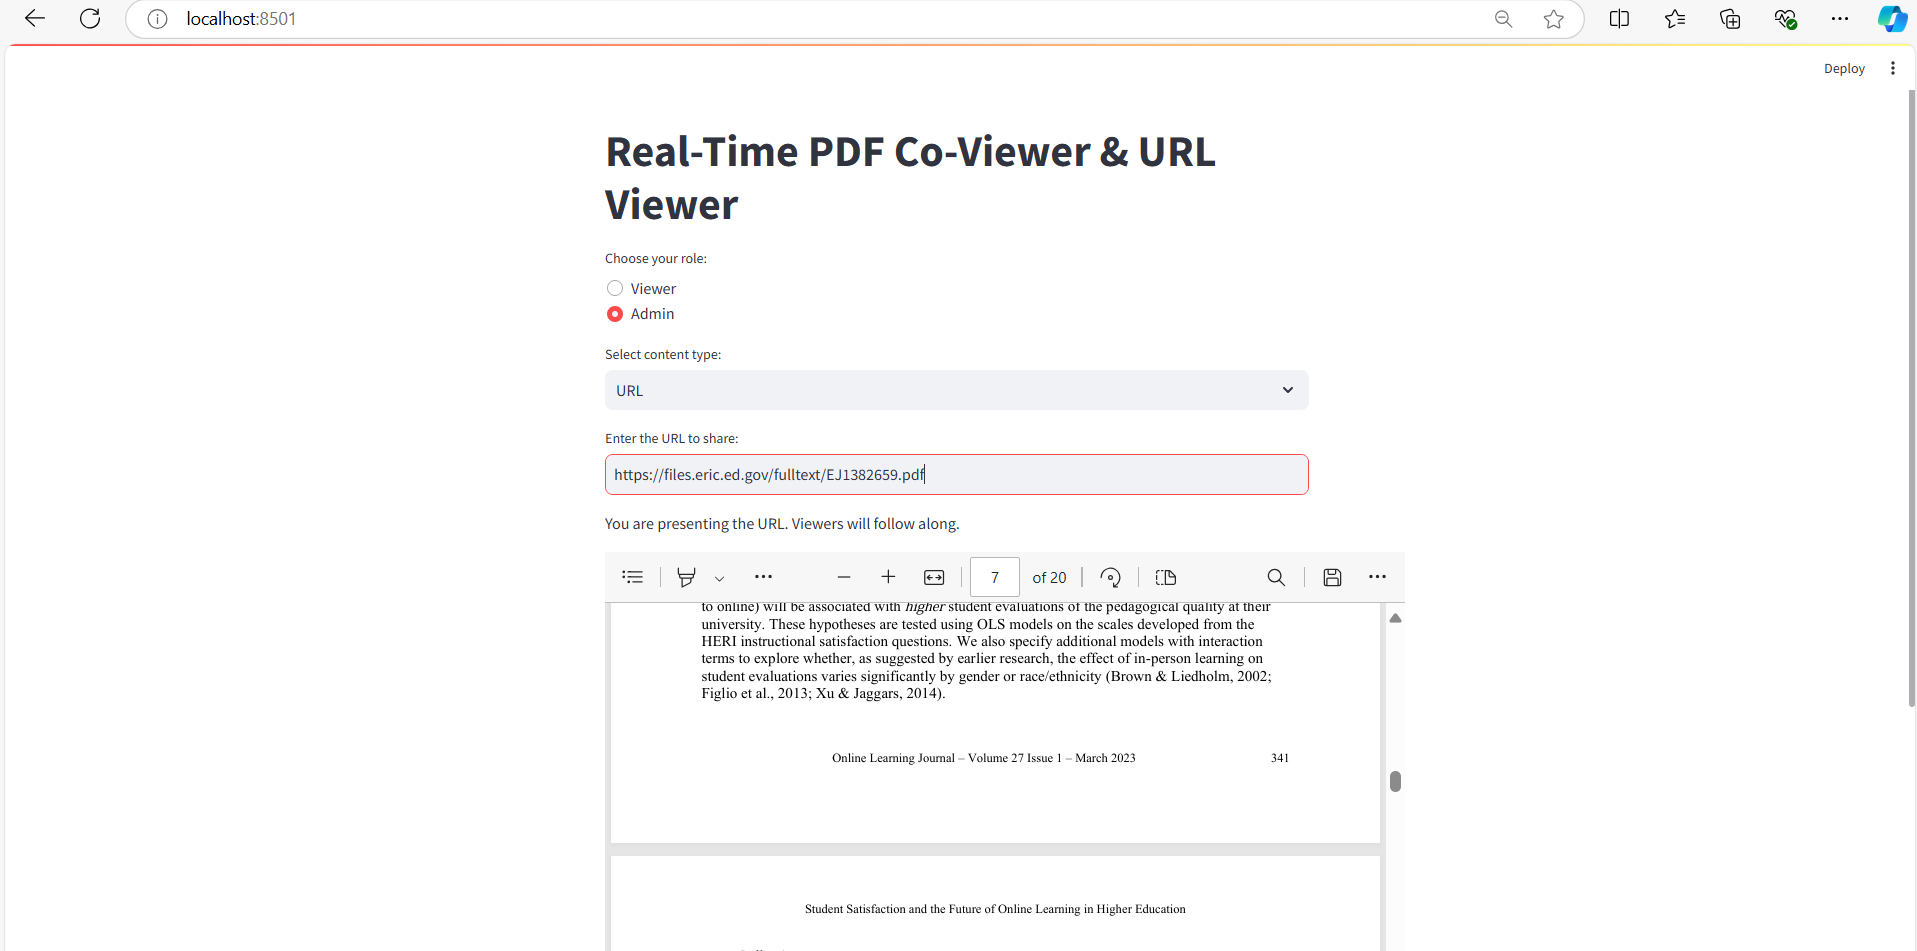




### **Use Case 2: Admin View of Individual Student Screens During Presentation**

**Scenario:** During the presentation, the teacher can see each student’s screen view individually, displayed alongside the main presentation. 

**Functionality:**
- When presenting a PDF, the teacher sees a replica of the students’ view, ensuring all are on the same page.
- If sharing a URL, the teacher can monitor each student’s individual activity on the shared page, allowing them to observe if students scroll away or interact inappropriately with the content.

**Benefit:** By seeing individual student screens in real time, the teacher can immediately address off-task behavior and provide more personalized attention to students who may need additional guidance.



In [20]:
streamlit_code = """
import streamlit as st
import fitz  # PyMuPDF for PDF handling
import io
from PIL import Image

# App title
st.title("Real-Time PDF Co-Viewer & URL Viewer")

# Initialize session state for current page
if "current_page" not in st.session_state:
    st.session_state.current_page = 1

# Role selection (Admin or Viewer)
role = st.radio("Choose your role:", ("Viewer", "Admin"))

# Only Admin has the option to upload PDF or enter URL
if role == "Admin":
    # Option for PDF or URL
    content_type = st.selectbox("Select content type:", ("PDF", "URL"))

    if content_type == "PDF":
        # Upload PDF
        pdf_file = st.file_uploader("Upload a PDF", type=["pdf"])

        if pdf_file:
            # Open the PDF with PyMuPDF
            pdf = fitz.open(stream=pdf_file.read(), filetype="pdf")
            total_pages = pdf.page_count

            # Create two columns for Admin and Viewer views
            col1, col2 = st.columns(2)

            # Admin View in left column
            with col1:
                st.header("Admin View")
                st.session_state.current_page = st.slider(
                    "Navigate through pages", 1, total_pages, st.session_state.current_page, key="admin_slider"
                )

            # Viewer View in right column
            with col2:
                st.header("Viewer View")
                st.write("Following the admin's lead...")

            # Display the current page in both views
            page = pdf.load_page(st.session_state.current_page - 1)  # zero-indexed
            pix = page.get_pixmap()
            img = Image.open(io.BytesIO(pix.tobytes("png")))

            # Show the image in both columns
            with col1:
                st.image(img, caption=f"Admin - Page {st.session_state.current_page}/{total_pages}", use_column_width=True)
            with col2:
                st.image(img, caption=f"Viewer - Page {st.session_state.current_page}/{total_pages}", use_column_width=True)

            # Close the PDF when done
            pdf.close()

    elif content_type == "URL":
        # URL input field
        url = st.text_input("Enter the URL to share:")

        if url:
            st.write("You are presenting the URL. Viewers will follow along.")
            # Admin can display the content in the iframe (if it's a webpage)
            st.markdown(f'<iframe src="{url}" width="800" height="600"></iframe>', unsafe_allow_html=True)

elif role == "Viewer":
    # Viewers just see the content being presented by the admin
    st.write("Following the admin's lead...")
    
    # Placeholder for the viewer (they only see what the admin shares)
    st.write("You are viewing the content shared by the admin.")
"""

# Save the code as a .py file
with open("pdf_and_url_co_viewer_admin_1to1.py", "w") as file:
    file.write(streamlit_code)


In [ ]:
streamlit run "C:\Users\mural\anaconda3\python\job\pdf_and_url_co_viewer_admin_1to1.py"

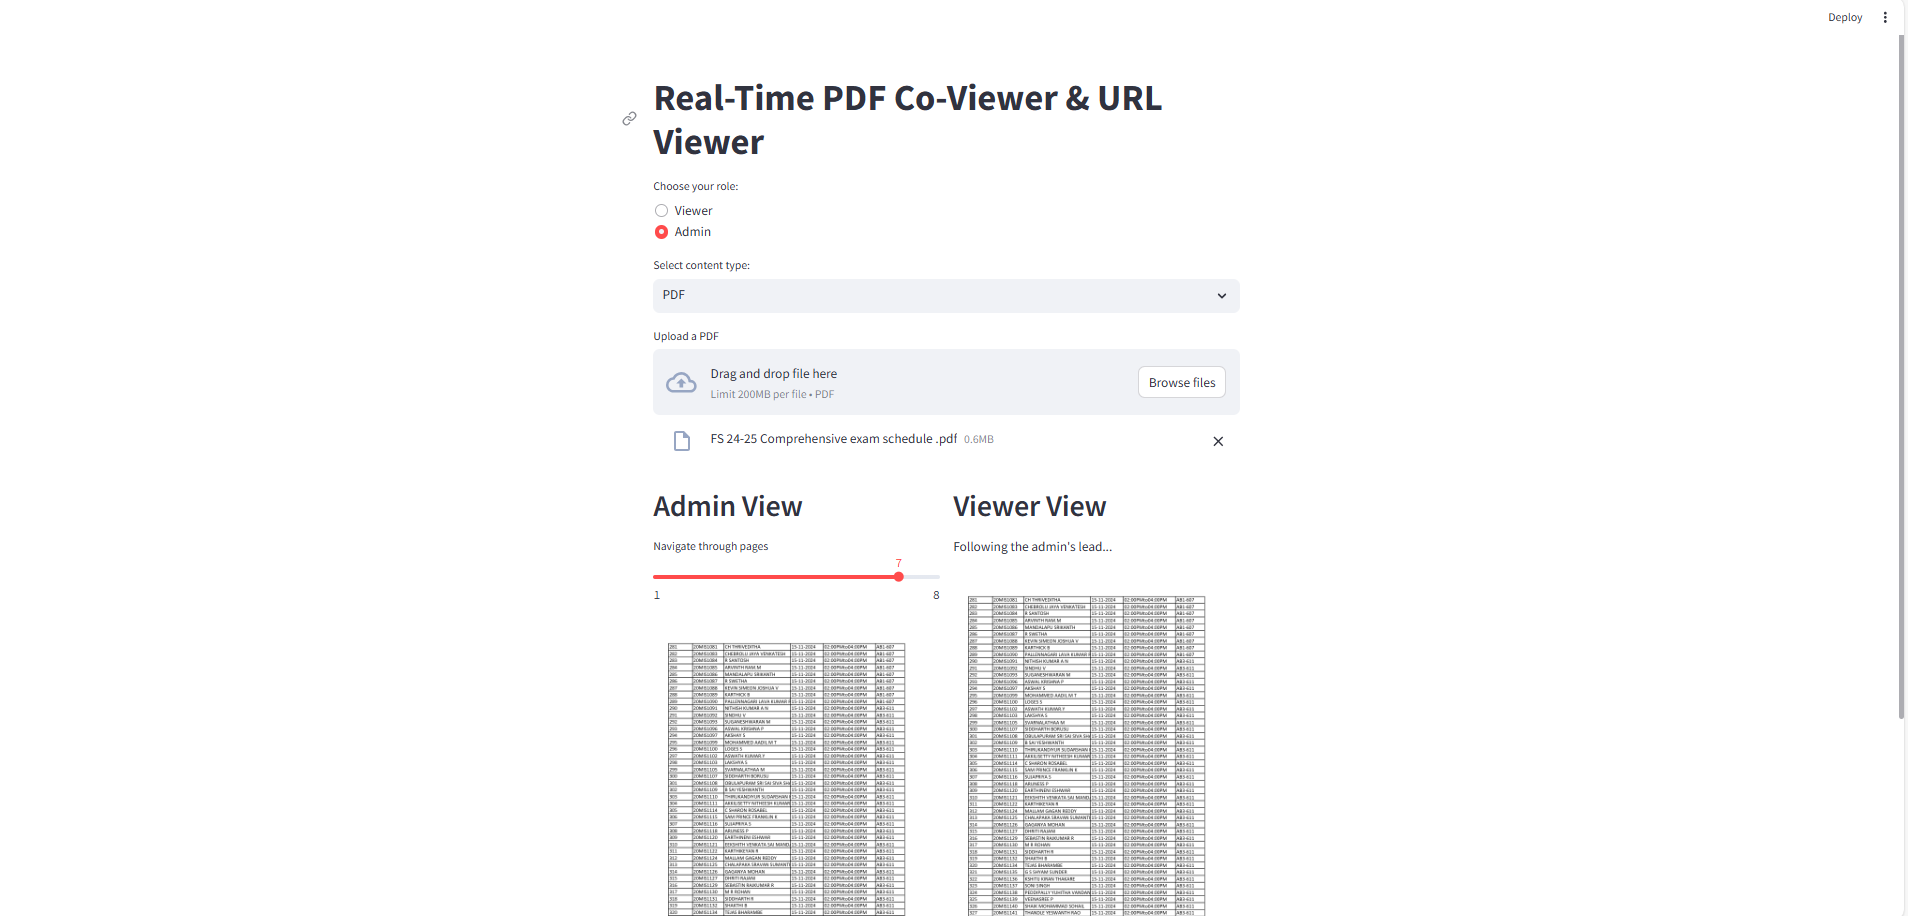



### **Use Case 3: Admin View of Multiple Student Screens in Parallel**

**Scenario:** In larger classes, the teacher can view multiple students’ screens in a grid format, keeping track of overall engagement without focusing on one specific student.

**Functionality:**
- A dynamic layout adjusts the number of student screens per row based on the class size, making it easier to monitor larger groups effectively.
- Teachers can see a quick snapshot of all students’ activity, ensuring that each student is engaged with the material and is not distracted by other content.

**Benefit:** This real-time monitoring reinforces classroom discipline in an online environment and allows the teacher to ensure maximum engagement across the entire class.



In [21]:
streamlit_code = """
import streamlit as st
import fitz  # PyMuPDF for PDF handling
import io
from PIL import Image

# App title
st.title("Real-Time PDF Co-Viewer & URL Viewer")

# Initialize session state for the current page
if "current_page" not in st.session_state:
    st.session_state.current_page = 1

# Role selection (Admin or Viewer)
role = st.radio("Choose your role:", ("Viewer", "Admin"))

# Only Admin has the option to upload PDF or enter URL
if role == "Admin":
    # Option for PDF or URL
    content_type = st.selectbox("Select content type:", ("PDF", "URL"))

    if content_type == "PDF":
        # Upload PDF
        pdf_file = st.file_uploader("Upload a PDF", type=["pdf"])

        if pdf_file:
            # Open the PDF with PyMuPDF
            pdf = fitz.open(stream=pdf_file.read(), filetype="pdf")
            total_pages = pdf.page_count

            # User input for the number of viewer screens
            num_viewers = st.number_input("Number of Viewer Screens", min_value=1, max_value=10, value=2)

            # Set the number of viewer screens for the session
            st.session_state["num_viewers"] = num_viewers

            # Create columns dynamically: one Admin and multiple Viewer columns
            columns = st.columns(num_viewers + 1)

            # Admin View in the first column
            with columns[0]:
                st.header("Admin View")
                st.session_state.current_page = st.slider(
                    "Navigate through pages", 1, total_pages, st.session_state.current_page, key="admin_slider"
                )

            # Display the current page in all views
            page = pdf.load_page(st.session_state.current_page - 1)  # zero-indexed
            pix = page.get_pixmap()
            img = Image.open(io.BytesIO(pix.tobytes("png")))

            # Display Admin view image
            with columns[0]:
                st.image(img, caption=f"Admin - Page {st.session_state.current_page}/{total_pages}", use_column_width=True)

            # Viewer Views in the remaining columns
            for i in range(1, num_viewers + 1):
                with columns[i]:
                    st.header(f"Viewer {i}")
                    st.image(img, caption=f"Viewer {i} - Page {st.session_state.current_page}/{total_pages}", use_column_width=True)

            # Close the PDF when done
            pdf.close()

    elif content_type == "URL":
        # URL input field
        url = st.text_input("Enter the URL to share:")

        if url:
            st.write("You are presenting the URL. Viewers will follow along.")
            # Admin can display the content in the iframe (if it's a webpage)
            st.markdown(f'<iframe src="{url}" width="800" height="600"></iframe>', unsafe_allow_html=True)

elif role == "Viewer":
    # Viewers just see the content being presented by the admin
    st.write("Following the admin's lead...")
    
    # Placeholder for the viewer (they only see what the admin shares)
    st.write("You are viewing the content shared by the admin.")
"""

# Save the code as a .py file
with open("pdf_and_url_co_viewer_admin_only_multiple.py", "w") as file:
    file.write(streamlit_code)


In [ ]:
streamlit run "C:\Users\mural\anaconda3\python\job\pdf_and_url_co_viewer_admin_only_multiple.py"

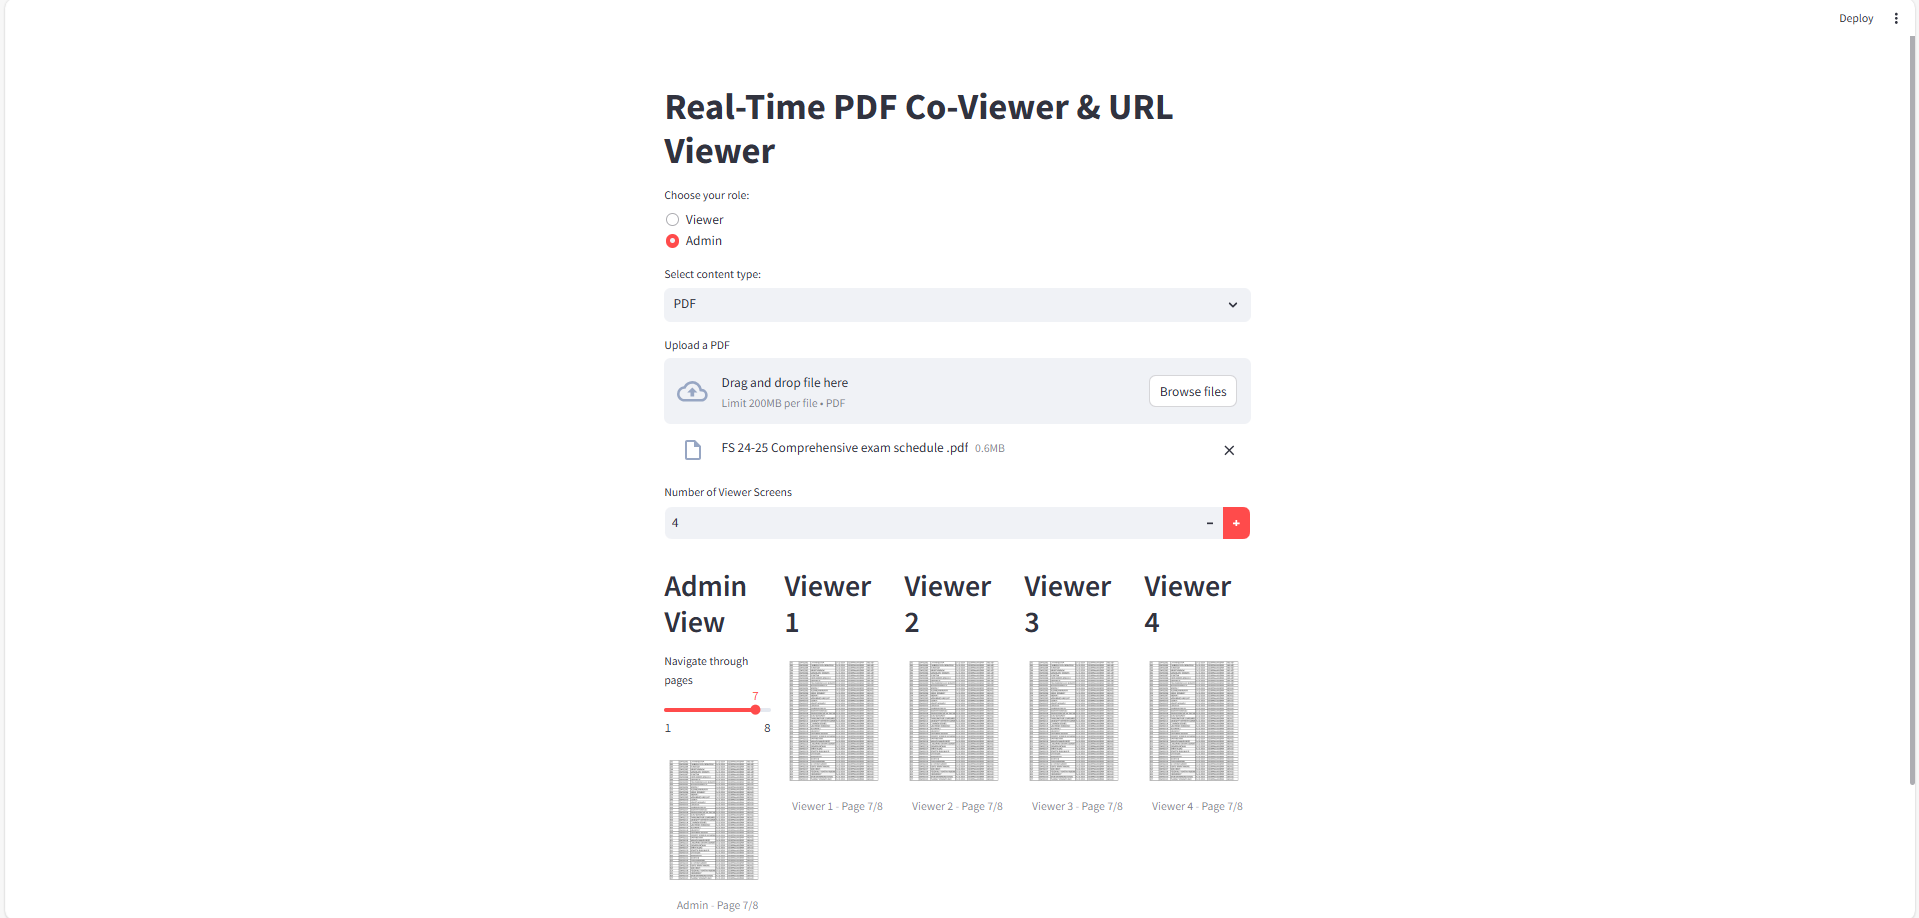



### **Use Case 4: Student Monitoring System by Teacher**

**Scenario:** The monitoring feature enables the teacher to effectively manage student behavior and learning progress, akin to a traditional classroom setting.

**Functionality:**
- Teachers have a full, side-by-side view of all student screens during the session, offering insights into each student’s attentiveness.
- If students stray from the lesson (e.g., attempt to browse unrelated content in a URL-based lesson), the teacher can immediately intervene to refocus their attention.
- During pandemic-like situations where online education is predominant, this monitoring system provides a semblance of in-person oversight, helping teachers maintain quality education.

**Benefit:** The monitoring system replicates the classroom environment online, making remote learning as effective as in-person classes. By directly observing each student’s participation, teachers can identify students who may need extra help, encourage engagement, and prevent distractions. This enhances the overall learning experience and helps bridge the gap between online and offline education.



In [16]:
streamlit_code = """

import streamlit as st
import fitz  # PyMuPDF for PDF handling
import io
from PIL import Image

# App title
st.title("Real-Time PDF Co-Viewer")

# Initialize session state for the current page
if "current_page" not in st.session_state:
    st.session_state.current_page = 1

# Upload PDF or Enter URL
st.sidebar.header("Upload a PDF or Enter a URL")

# PDF upload option
pdf_file = st.sidebar.file_uploader("Upload a PDF", type=["pdf"])

# URL entry option
url_input = st.sidebar.text_input("Or enter a URL")

if pdf_file or url_input:
    if pdf_file:
        # Open the PDF with PyMuPDF
        pdf = fitz.open(stream=pdf_file.read(), filetype="pdf")
        total_pages = pdf.page_count

        # Admin View (PDF navigation)
        st.header("Admin View (PDF)")
        st.session_state.current_page = st.slider(
            "Navigate through pages", 1, total_pages, st.session_state.current_page, key="admin_slider"
        )

        # Display the current page
        page = pdf.load_page(st.session_state.current_page - 1)  # zero-indexed
        pix = page.get_pixmap()
        img = Image.open(io.BytesIO(pix.tobytes("png")))

        # Display Admin's page
        st.image(img, caption=f"Admin - Page {st.session_state.current_page}/{total_pages}", use_column_width=True)

    elif url_input:
        # Admin View (URL display)
        st.header("Admin View (URL)")
        st.write("Displaying URL:", url_input)
        st.markdown(f'<iframe src="{url_input}" width="100%" height="600"></iframe>', unsafe_allow_html=True)

    # User input for the number of viewer screens
    num_viewers = st.number_input("Number of Viewer Screens", min_value=1, max_value=10, value=2)

    # Display Viewer Screens in a responsive layout
    st.subheader("Viewer Screens")

    # Determine layout for viewer screens
    cols_per_row = 2 if num_viewers <= 2 else 3 if num_viewers <= 6 else 4
    rows = (num_viewers + cols_per_row - 1) // cols_per_row

    # Display the viewer screens
    viewer_idx = 1
    for _ in range(rows):
        cols = st.columns(min(cols_per_row, num_viewers - viewer_idx + 1))
        for col in cols:
            if viewer_idx <= num_viewers:
                with col:
                    if pdf_file:
                        # Display PDF page for viewers
                        st.image(img, caption=f"Viewer {viewer_idx} - Page {st.session_state.current_page}/{total_pages}", use_column_width=True)
                    elif url_input:
                        # Display URL for viewers
                        st.markdown(f'<iframe src="{url_input}" width="100%" height="400"></iframe>', unsafe_allow_html=True)
                viewer_idx += 1

    # Close the PDF when done
    if pdf_file:
        pdf.close()

"""

# Save the code as a .py file
with open("pdf_co_viewer_responsive_layout_fixed1.py", "w") as file:
    file.write(streamlit_code)


In [ ]:
streamlit run "C:\Users\mural\anaconda3\python\job\pdf_co_viewer_responsive_layout_fixed1.py"

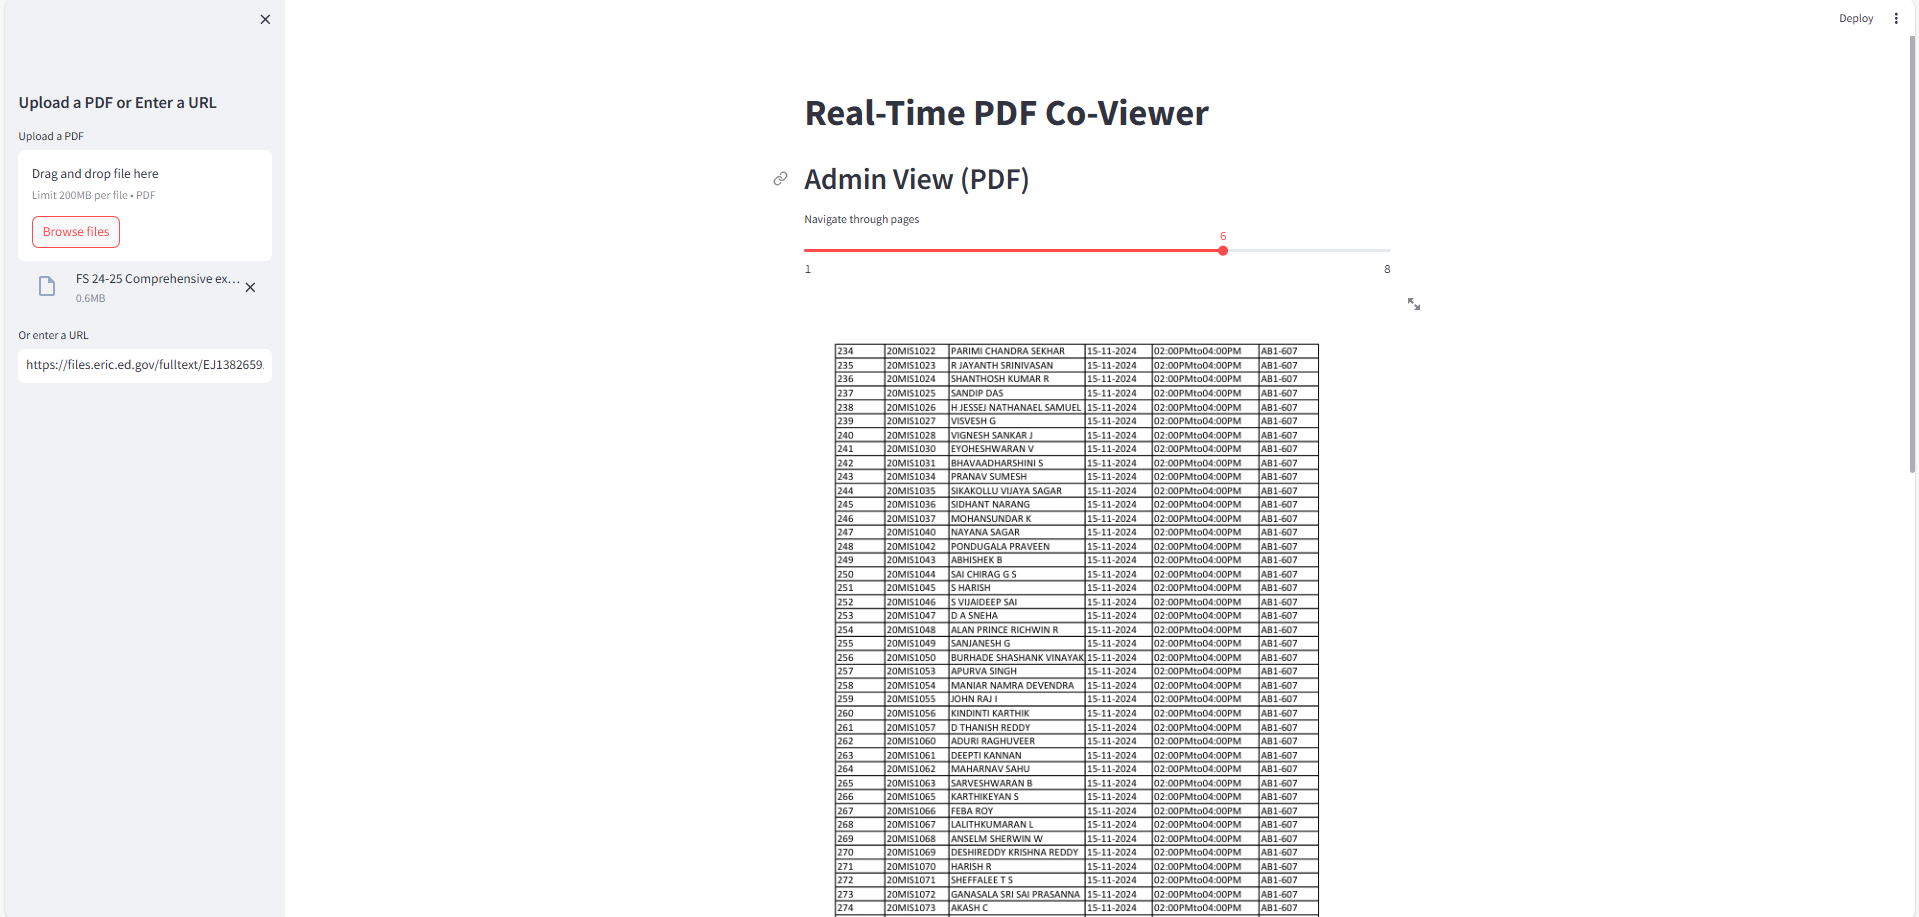

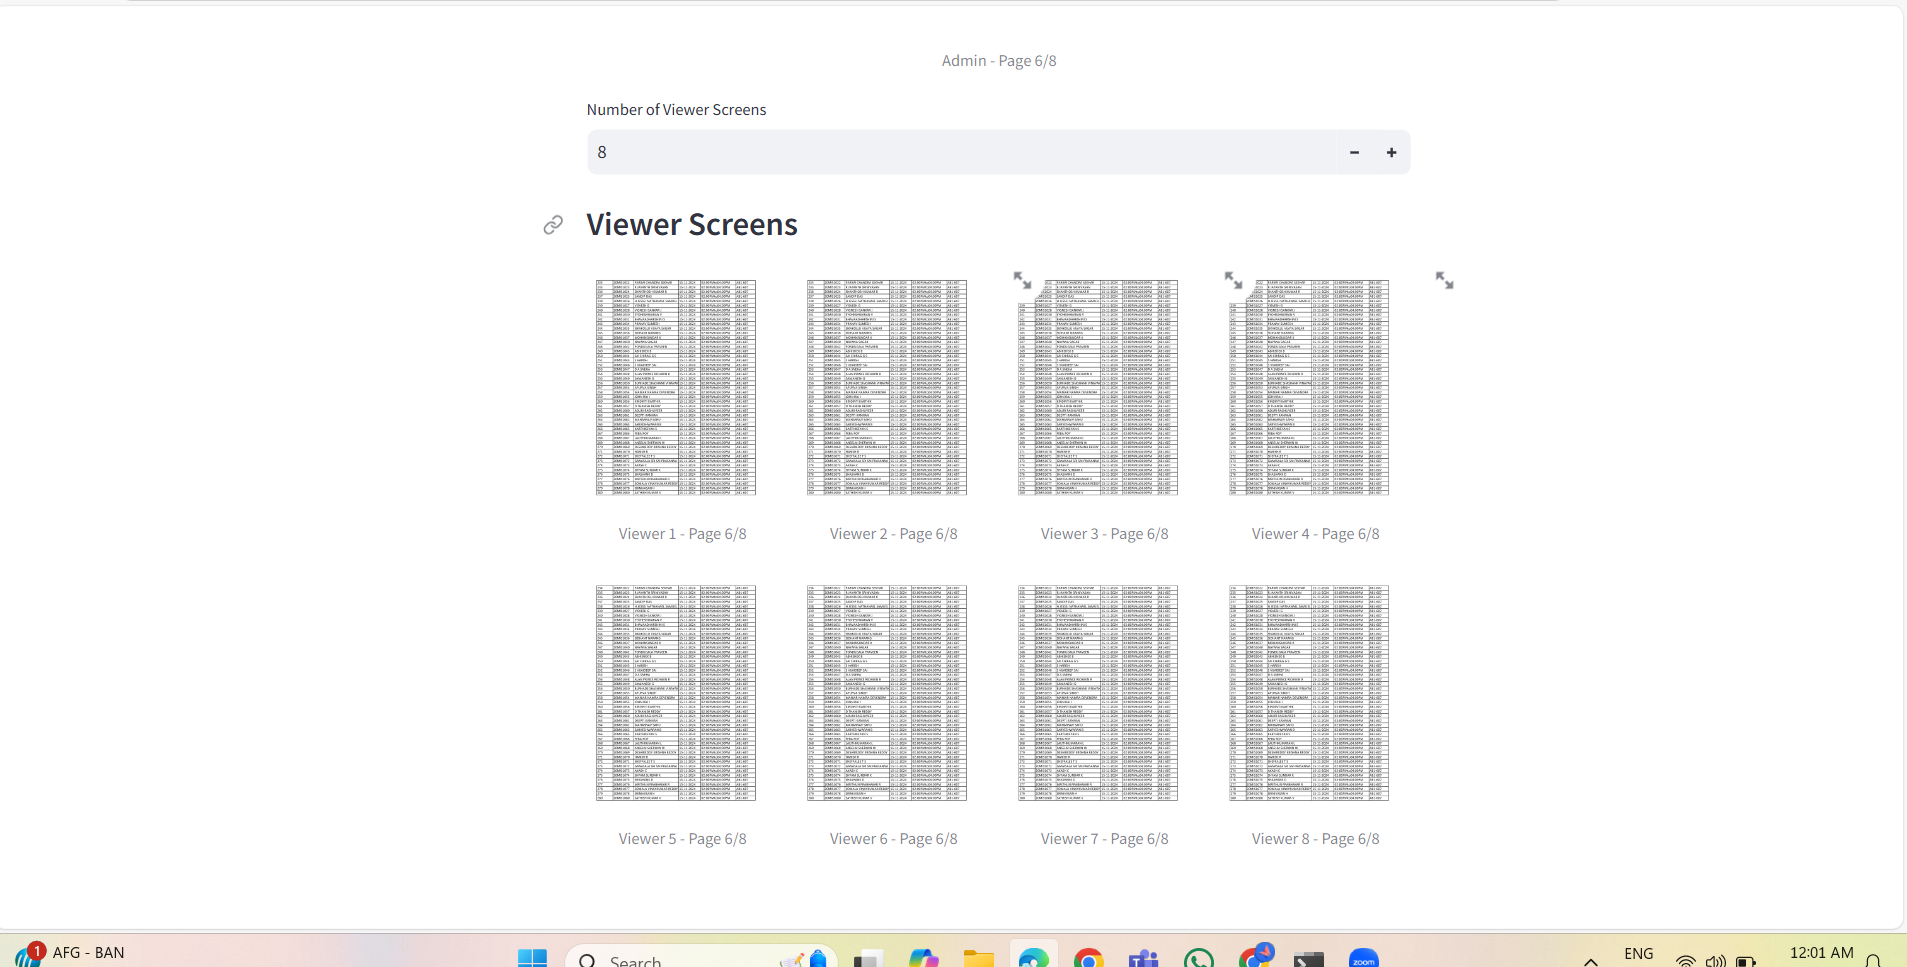



### **Conclusion: Future-Proofing Education with Hybrid Learning Support**

As online education becomes increasingly common, tools like this will help teachers combine the best aspects of in-person and virtual classrooms. With capabilities for monitoring, interaction, and flexible content sharing, the platform addresses the limitations of remote learning, ensuring that teachers retain full control over the educational experience and that students remain engaged.